In [1]:
import sys
from core.data_import.test_station import *
from core.analysis.plots import *
from core.analysis.histograms import *
from core.analysis.tables import *
from core.limits.limits import *

c:\python3\lib\site-packages\matplotlib\__init__.py:913: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


Define datapath of datasets to analyze and the limits file location:

In [2]:
datapath = "test files/PTC Raw Data"
limits_file = "test files/P552 MCA PV AUX LIMITS.xlsx"

Define some constants:

In [3]:
BOARDS = ['B1', 'B2', 'B3', 'B4', 'B5', 'B6']  # all possible test station boards

The selected test station boards and test temperatures to analyze:

In [4]:
boards = ['B3', 'B4', 'B5', 'B6']  # boards selected by user
temps = [-40, 85]  # temps selected by user

Create limits dictionary from the limits file (excel file) and print out the information. The dictionary
contains the lower and upper limits for each temp/voltage/mode condition in the test (e.g. - '23C, Boards 4 and 5 ON, 9V'). 

In [5]:
limits = Limits(limits_file, 'Sheet1', BOARDS, temps)
limits.print_info()

Board/Module Pairs: {'B5': 'TURN', 'B2': '---', 'B6': 'OUTAGE', 'B1': '---', 'B3': 'PARK', 'B4': 'DRL'}

Mode Columns: {'B5': 7, 'B3B5': 11, 'B3': 5, 'B4': 3, 'B4B5': 9} 

{-40: {'B3': {9.0: (0.459, 0.561), 14.1: (0.28, 0.342), 16.0: (0.247, 0.302)},
       'B3B5': {9.0: (1.972, 2.411), 14.1: (1.19, 1.454), 16.0: (1.043, 1.275)},
       'B4': {9.0: (1.09, 1.333), 14.1: (0.702, 0.858), 16.0: (0.618, 0.755)},
       'B4B5': {9.0: (2.58, 3.154), 14.1: (1.583, 1.934), 16.0: (1.392, 1.701)},
       'B5': {9.0: (1.571, 1.92), 14.1: (0.94, 1.148), 16.0: (0.824, 1.007)}},
 85: {'B3': {9.0: (0.447, 0.546), 14.1: (0.27, 0.33), 16.0: (0.239, 0.292)},
      'B3B5': {9.0: (1.866, 2.28), 14.1: (1.118, 1.366), 16.0: (0.981, 1.2)},
      'B4': {9.0: (1.083, 1.324), 14.1: (0.693, 0.847), 16.0: (0.61, 0.745)},
      'B4B5': {9.0: (2.527, 3.089), 14.1: (1.528, 1.867), 16.0: (1.356, 1.657)},
      'B5': {9.0: (1.462, 1.787), 14.1: (0.877, 1.072), 16.0: (0.77, 0.941)}}}


You can create a TestStation object (collection of dataframes and other information regarding the test) from the input boards, datapath, limits, and temperatures. The user is alerted as each dataframe is being built and the board cobminations are displayed after building all board dataframes. This can take a bit of time (several seconds or so) if it is a really long test.

In [6]:
test = TestStation('Test', boards, datapath, limits, *temps)

Building B3 dataframe...
...dataframe complete.
Building B4 dataframe...
...dataframe complete.
Building B5 dataframe...
...dataframe complete.
Building B6 dataframe...
...dataframe complete.

=> Board combos present:  ['B3', 'B4', 'B5B6', 'B3B5B6', 'B4B5B6'] 



The test station object contains many attributes that are pieces of the test information: 

In [7]:
test.boards # all boards that were used in the test

[Board: B3 PARK, Board: B4 DRL, Board: B5 TURN, Board: B6 OUTAGE]

In [8]:
test.modes # all modes that were excited during the test

[Mode: PARK (B3),
 Mode: DRL (B4),
 Mode: TURN (B5B6),
 Mode: PARKTURN (B3B5B6),
 Mode: DRLTURN (B4B5B6)]

In [9]:
test.limits.board_module_pairs

{'B1': '---',
 'B2': '---',
 'B3': 'PARK',
 'B4': 'DRL',
 'B5': 'TURN',
 'B6': 'OUTAGE'}

In [10]:
test.systems  # names of systems/samples on all used test positions (up to 12 test positions) 

['TP1: System 82',
 'TP2: System 83',
 'TP3: System 84',
 'TP4: System 85',
 'TP5: System 86',
 'TP6: System 87',
 'TP7: System 88',
 'TP8: System 89',
 'TP9: System 90',
 'TP10: System 91',
 'TP11: System 92',
 'TP12: System 93']

In [11]:
test.voltages # the voltages applied during the test

[9.0, 14.1, 16.0]

In [12]:
test.temps # all test temperatures

(-40, 85)

In [13]:
test.thermocouples  # all thermocouples that have valid data

['Amb Temp TC1', 'TC2', 'TC3', 'TC4']

The Test Station object also has contains a "mother dataframe" (mdf) that is essentially all the test board data stitched together as a giant dataframe:

In [14]:
test.mdf

,Amb Temp TC1,TC2,TC3,TC4,VSetpoint,VSense 1 B3,VSense 2 B3,Board on/off B3,TP1: System 82 B3,TP2: System 83 B3,...,TP3: System 84 B6,TP4: System 85 B6,TP5: System 86 B6,TP6: System 87 B6,TP7: System 88 B6,TP8: System 89 B6,TP9: System 90 B6,TP10: System 91 B6,TP11: System 92 B6,TP12: System 93 B6
Date Time,,,,,,,,,,,,,,,,,,,,,
2017-02-06 18:50:57,-42.518,-42.032,-41.992,-42.125,9.0,0.003,0.003,0.0,0.0,0.0,...,0.00071,0.00000,0.00000,0.00000,0.00000,0.00071,0.00000,0.00000,0.00000,0.00000
2017-02-06 18:51:03,-42.594,-42.025,-42.040,-42.146,9.0,0.003,0.003,0.0,0.0,0.0,...,0.00071,0.00000,0.00000,0.00000,0.00000,0.00071,0.00071,0.00000,0.00000,-0.00071
2017-02-06 18:51:09,-42.702,-42.049,-42.053,-42.132,9.0,0.004,0.003,0.0,0.0,0.0,...,0.00000,0.00000,0.00071,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
2017-02-06 18:51:15,-42.777,-42.042,-42.094,-42.129,9.0,0.004,0.004,0.0,0.0,0.0,...,0.00000,-0.00071,0.00071,0.00071,-0.00071,0.00071,-0.00071,0.00071,0.00071,0.00000
2017-02-06 18:51:21,-42.842,-42.056,-42.122,-42.143,9.0,0.003,0.003,0.0,0.0,0.0,...,0.00000,0.00000,0.00000,0.00071,0.00000,0.00000,0.00000,0.00000,0.00000,-0.00071
2017-02-06 18:51:27,-42.889,-42.042,-42.166,-42.163,9.0,0.004,0.005,0.0,0.0,0.0,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00071,-0.00071,0.00000,0.00071
2017-02-06 18:51:33,-42.918,-42.063,-42.204,-42.160,9.0,0.003,0.004,0.0,0.0,0.0,...,0.00000,0.00071,0.00071,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
2017-02-06 18:51:39,-42.921,-42.056,-42.218,-42.190,9.0,0.005,0.005,0.0,0.0,0.0,...,0.00000,0.00000,0.00071,0.00000,0.00000,-0.00071,0.00000,0.00000,0.00000,0.00071
2017-02-06 18:51:45,-42.983,-42.062,-42.252,-42.228,9.0,0.003,0.003,0.0,0.0,0.0,...,0.00000,0.00000,0.00000,0.00071,0.00000,0.00000,-0.00071,0.00000,0.00000,0.00000


Individual boards can also be accessed. They will read 'Not Used' if the board was not used in the test.

In [15]:
test.b1

'Not Used'

In [16]:
test.b3

Board: B3 PARK

Each board is it's own Board object (see 'board.py'). They contain their own attributes.

In [17]:
board = test.b3
print(board.id)
print(board.outage)  # whether or not board is outage

B3
False


A Board object also contains a dataframe (df) of only that board's data:

In [18]:
board.df

,Amb Temp TC1,TC2,TC3,TC4,VSetpoint,VSense 1,VSense 2,Board on/off,TP1: System 82,TP2: System 83,TP3: System 84,TP4: System 85,TP5: System 86,TP6: System 87,TP7: System 88,TP8: System 89,TP9: System 90,TP10: System 91,TP11: System 92,TP12: System 93
Date Time,,,,,,,,,,,,,,,,,,,,
2017-02-06 18:50:57,-42.518,-42.032,-41.992,-42.125,9.0,0.003,0.003,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2017-02-06 18:51:03,-42.594,-42.025,-42.040,-42.146,9.0,0.003,0.003,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2017-02-06 18:51:09,-42.702,-42.049,-42.053,-42.132,9.0,0.004,0.003,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2017-02-06 18:51:15,-42.777,-42.042,-42.094,-42.129,9.0,0.004,0.004,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2017-02-06 18:51:21,-42.842,-42.056,-42.122,-42.143,9.0,0.003,0.003,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2017-02-06 18:51:27,-42.889,-42.042,-42.166,-42.163,9.0,0.004,0.005,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2017-02-06 18:51:33,-42.918,-42.063,-42.204,-42.160,9.0,0.003,0.004,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2017-02-06 18:51:39,-42.921,-42.056,-42.218,-42.190,9.0,0.005,0.005,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2017-02-06 18:51:45,-42.983,-42.062,-42.252,-42.228,9.0,0.003,0.003,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


The modes of Test Station objects are also Mode objects of their own and encapsulate useful information:

In [19]:
mode = test.modes[0]
mode.name

'PARK'

In [20]:
mode.multimode

False

Each Mode object has a dataframe (df) that only contains the data when that mode is activated:

In [21]:
mode.df

,Amb Temp TC1,TC2,TC3,TC4,VSetpoint,VSense 1 B3,VSense 2 B3,Board on/off B3,TP1: System 82 B3,TP2: System 83 B3,...,TP3: System 84 B6,TP4: System 85 B6,TP5: System 86 B6,TP6: System 87 B6,TP7: System 88 B6,TP8: System 89 B6,TP9: System 90 B6,TP10: System 91 B6,TP11: System 92 B6,TP12: System 93 B6
Date Time,,,,,,,,,,,,,,,,,,,,,
2017-02-06 18:55:57,-42.937,-39.174,-41.686,-42.660,9.0,9.050,9.143,1.0,0.51281,0.51267,...,0.00071,0.00000,0.00000,0.00000,0.00000,0.00071,0.00071,0.00071,0.00000,0.00071
2017-02-06 18:56:03,-42.941,-39.191,-41.741,-42.722,9.0,9.087,9.074,1.0,0.51469,0.51490,...,0.00000,0.00071,0.00071,0.00000,0.00142,0.00000,0.00142,0.00071,-0.00142,0.00071
2017-02-06 18:56:09,-42.973,-39.228,-41.754,-42.663,9.0,9.086,9.084,1.0,0.51608,0.51656,...,0.00142,0.00213,-0.00213,-0.00071,0.00071,-0.00071,0.00000,0.00071,-0.00142,0.00000
2017-02-06 18:56:15,-42.951,-39.266,-41.809,-42.660,9.0,9.080,9.078,1.0,0.51601,0.51635,...,-0.00071,0.00000,0.00000,0.00000,0.00142,0.00000,0.00000,0.00000,-0.00071,0.00142
2017-02-06 18:56:21,-42.941,-39.293,-41.870,-42.691,9.0,9.063,9.058,1.0,0.51587,0.51608,...,0.00071,0.00071,-0.00071,0.00000,0.00000,-0.00142,0.00000,-0.00071,0.00000,0.00142
2017-02-06 18:56:27,-42.915,-39.307,-41.894,-42.712,9.0,9.079,8.977,1.0,0.51552,0.51573,...,0.00071,0.00213,0.00071,-0.00071,0.00000,0.00000,0.00000,-0.00142,0.00071,0.00213
2017-02-06 18:56:33,-42.915,-39.269,-41.949,-42.653,9.0,9.086,9.085,1.0,0.51538,0.51531,...,0.00000,0.00213,0.00000,0.00071,-0.00071,-0.00142,0.00071,-0.00071,0.00000,0.00000
2017-02-06 18:56:39,-42.923,-39.307,-41.977,-42.705,9.0,8.986,9.078,1.0,0.51531,0.51517,...,-0.00071,0.00000,0.00071,0.00142,0.00071,0.00000,0.00213,0.00000,0.00000,0.00000
2017-02-06 18:56:45,-42.951,-39.324,-42.064,-42.696,9.0,9.085,8.976,1.0,0.51517,0.51503,...,0.00000,-0.00071,0.00142,0.00071,0.00000,0.00000,0.00213,0.00142,0.00000,0.00071


Mode objects also have a method to get the basic statistics for each system/sample at each temperature/voltage condition in that mode. This data is thrown into its "current_stats" dictionary. This dictionary is in the following format: temperature->voltage->system->[minimum, maximum, mean, standard deviation].

In [22]:
for temp in temps:
    mode.get_system_by_system_mode_stats(temp, limits)
mode.current_stats

{-40: {9.0: {'TP10: System 91 B3': [0.50905999999999996,
    0.51829999999999998,
    0.5144301363938788,
    0.0010012520687540142,
    False],
   'TP11: System 92 B3': [0.51100999999999996,
    0.52073000000000003,
    0.5166395908183633,
    0.00109142529913696,
    False],
   'TP12: System 93 B3': [0.49781999999999998,
    0.50649,
    0.50300848636061213,
    0.00090447602300260924,
    False],
   'TP1: System 82 B3': [0.50871999999999995,
    0.51795000000000002,
    0.51464205921490347,
    0.00090530199288563911,
    False],
   'TP2: System 83 B3': [0.51141999999999999,
    0.52302000000000004,
    0.51616885229540921,
    0.0020871983419427859,
    False],
   'TP3: System 84 B3': [0.51190999999999998,
    0.52093999999999996,
    0.51608519627411842,
    0.0011583127373053252,
    False],
   'TP4: System 85 B3': [0.49919999999999998,
    0.50739999999999996,
    0.50461472388556228,
    0.00091071980104474631,
    False],
   'TP5: System 86 B3': [0.50871999999999995,
    0.517

Temporal plotting is useful to get a full picture of the test. This includes the functional cycles, temperature profile, and the currents. There two types of temporal plots to make --> currents by mode or by board.

By mode:

Plotting temporal plot...
'NoneType' object has no attribute 'remove'
'NoneType' object has no attribute 'remove'
'NoneType' object has no attribute 'remove'
'NoneType' object has no attribute 'remove'
...complete.



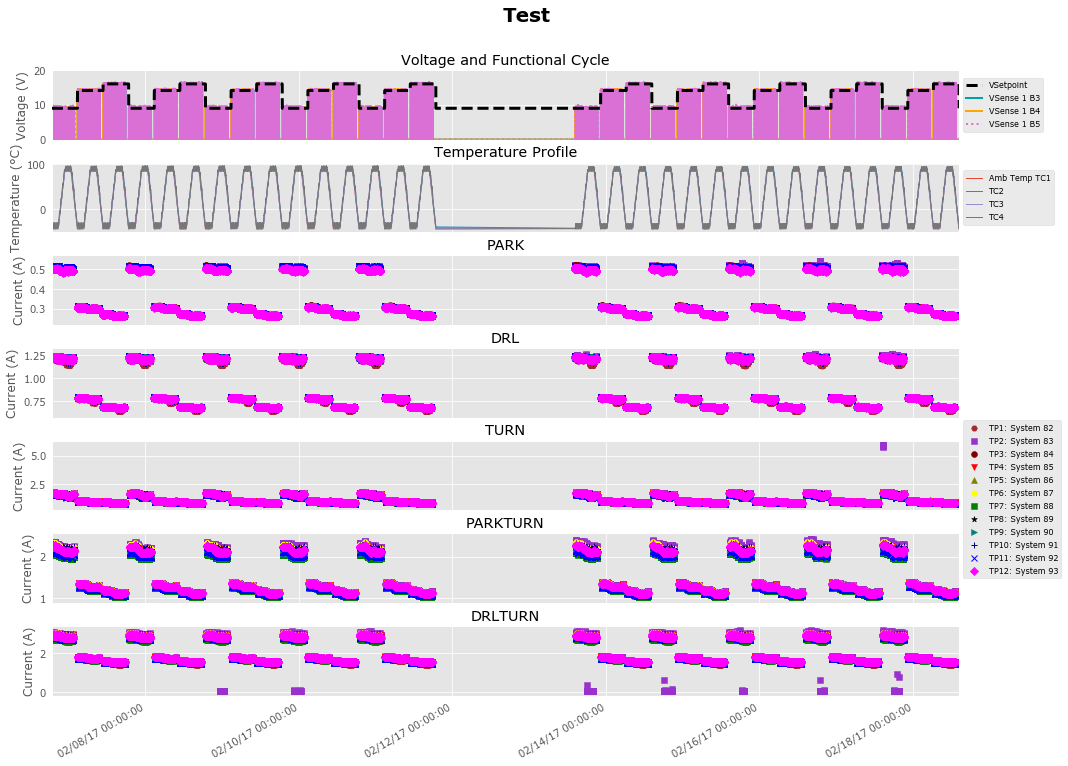

In [23]:
%matplotlib inline
plot_modes(test)

By board:

Plotting temporal plot...


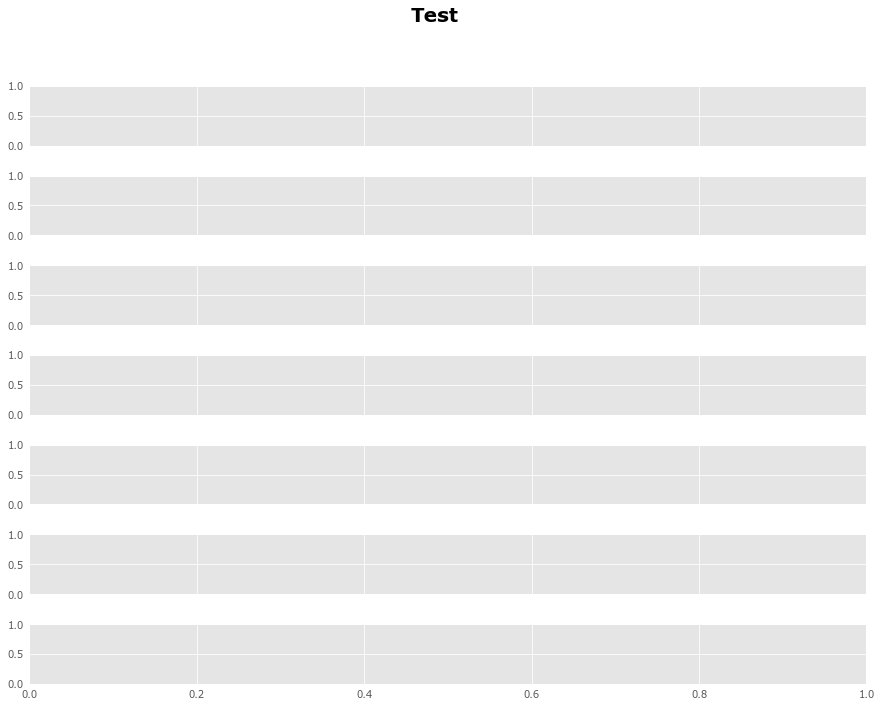

In [24]:
plot_boards(test)

A customized histogram function is also available to look at the spread of the currents measured during the test. This can be presented on a test level (all currents bundled together) or system by system (current histogram for each system) using the 'system_by_system' boolean input for this function. The red dashed vertical lines on each histogram are the current limits for that mode/temperature/voltage condition. 

Test level histograms:

Plotting histograms...

complete.


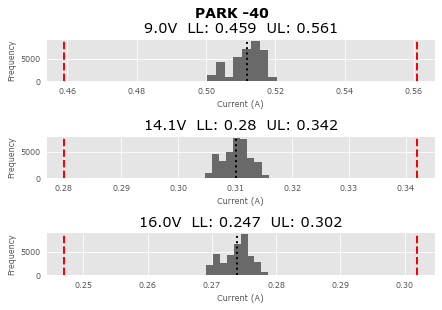

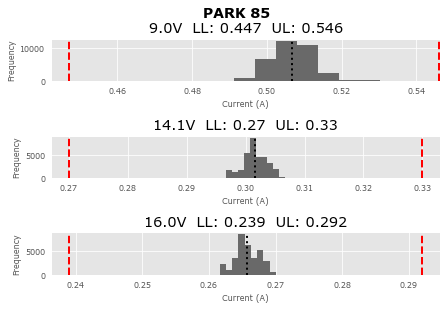

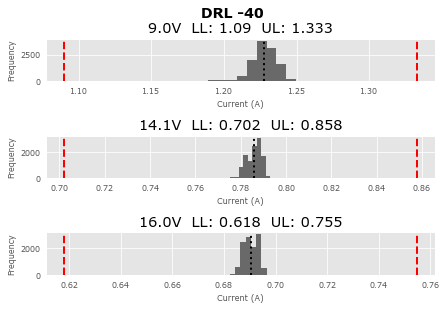

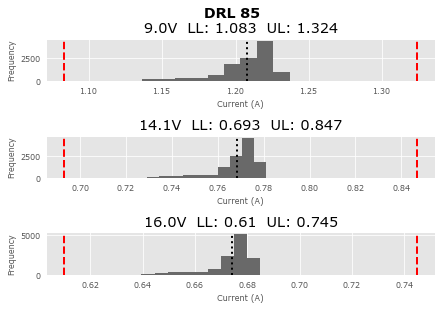

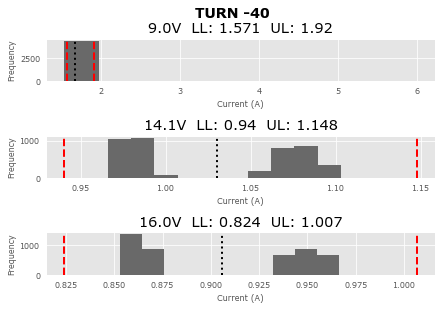

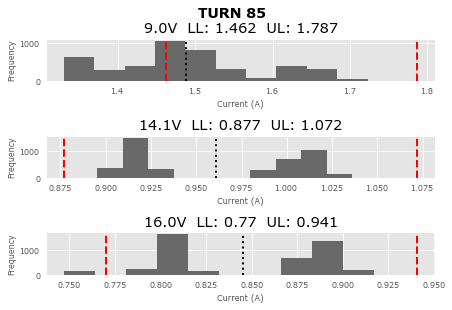

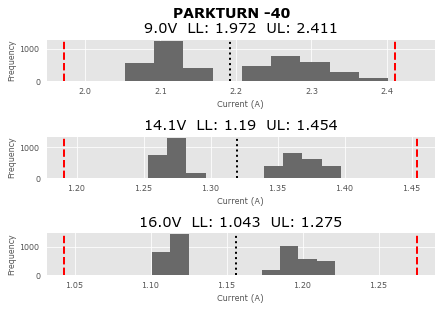

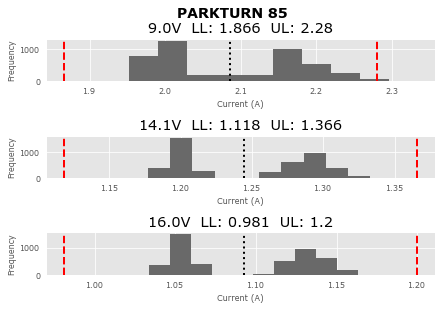

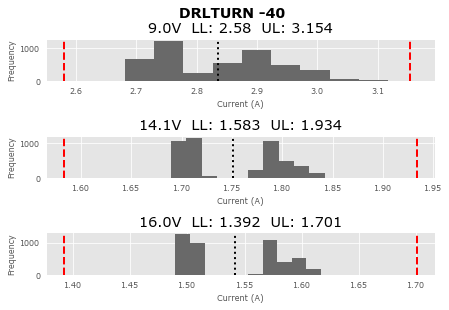

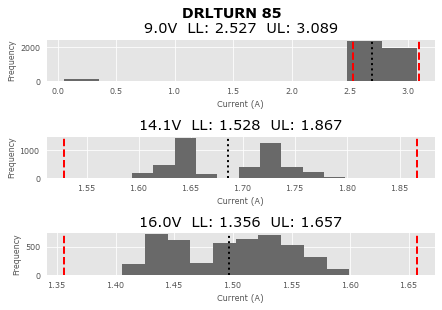

In [25]:
make_mode_histograms(test, system_by_system=False, limits=limits)

As seen above, a histogram for each mode excited is created for each user selected temperature. In this case, the test was only performed at 23°C so only histograms at that temperature are created.

When building systems on a system by system level, many more histograms may be created because a figure is created for each voltage.

Plotting histograms...



c:\python3\lib\site-packages\matplotlib\pyplot.py:524: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


complete.


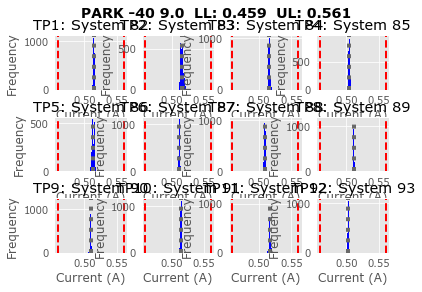

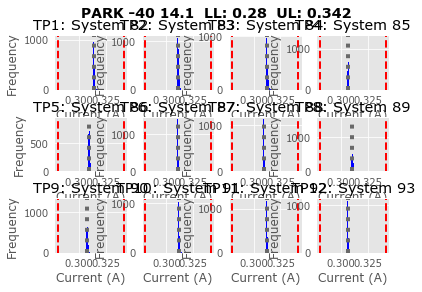

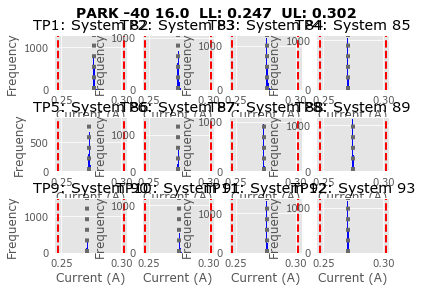

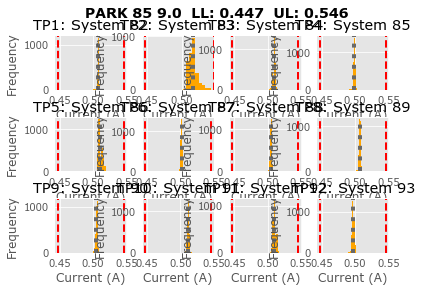

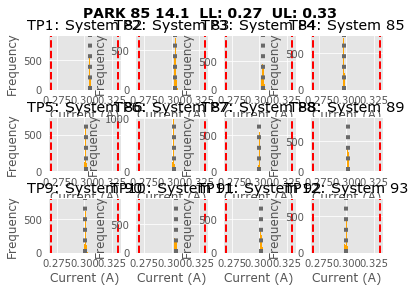

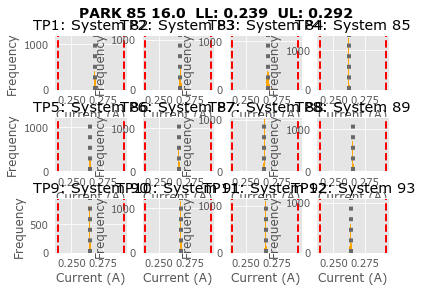

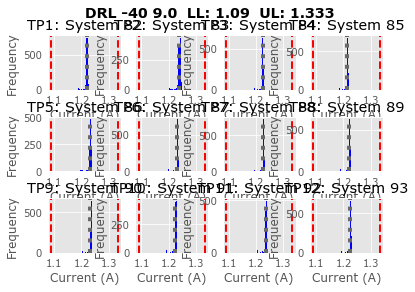

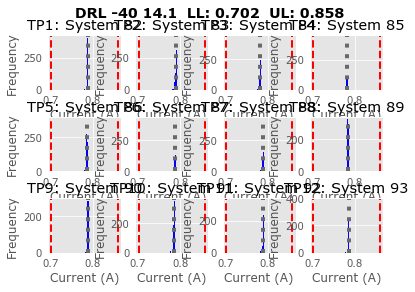

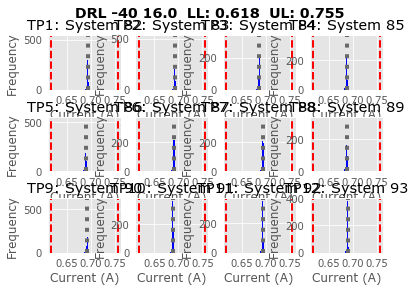

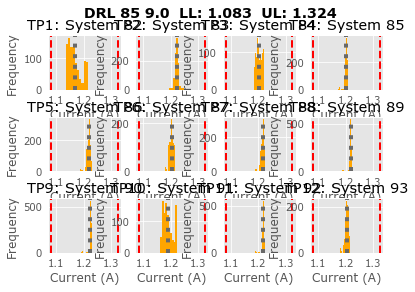

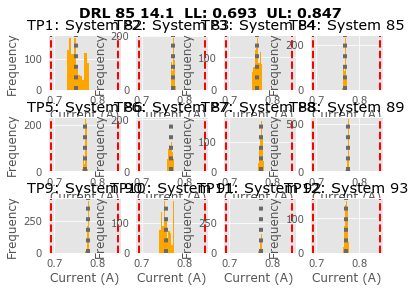

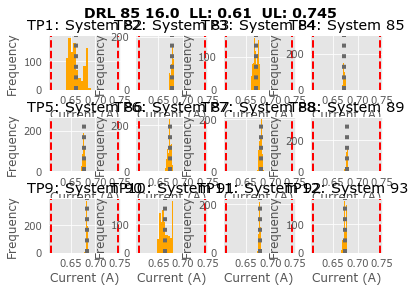

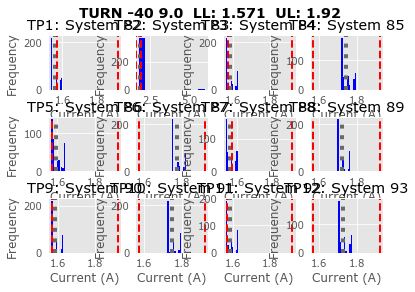

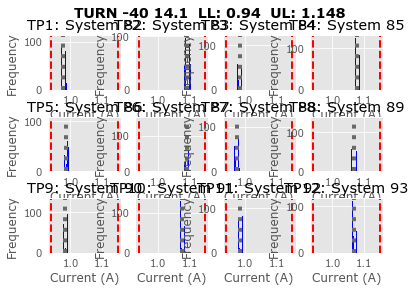

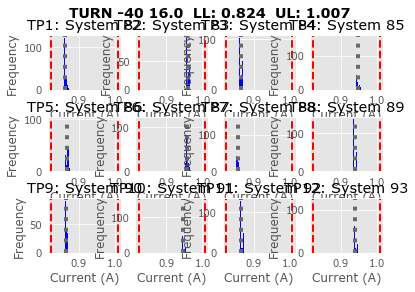

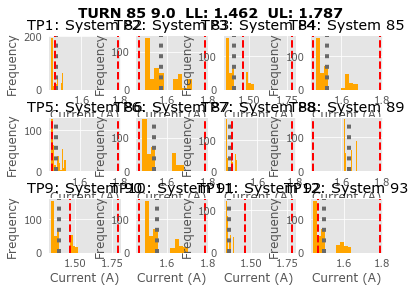

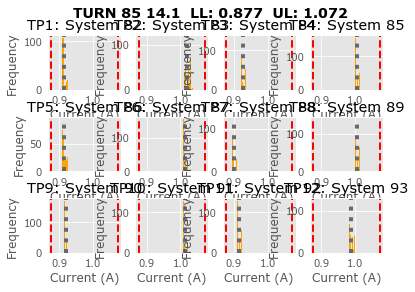

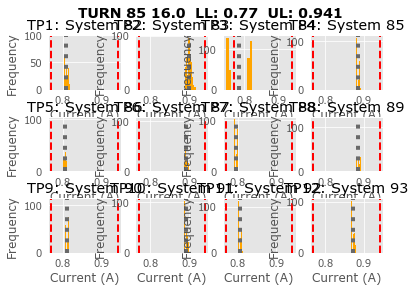

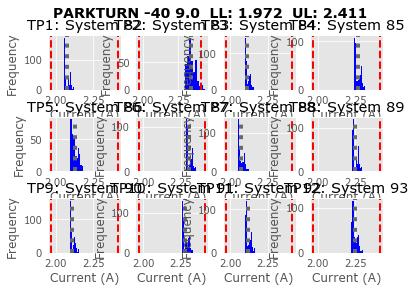

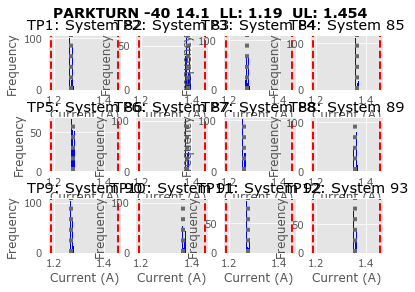

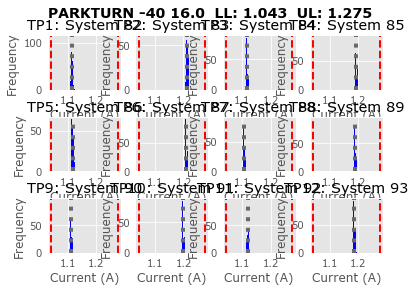

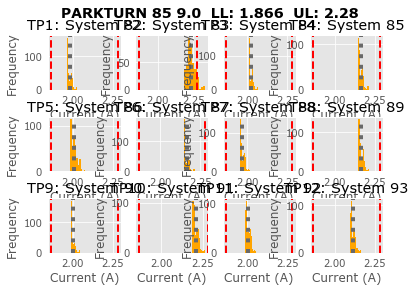

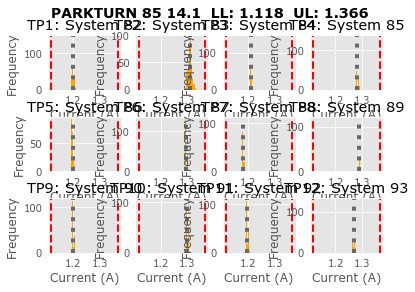

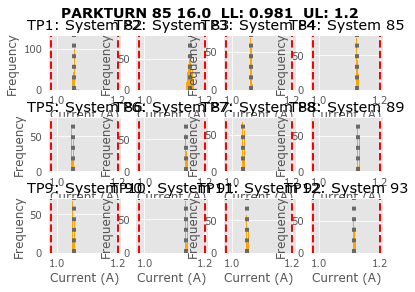

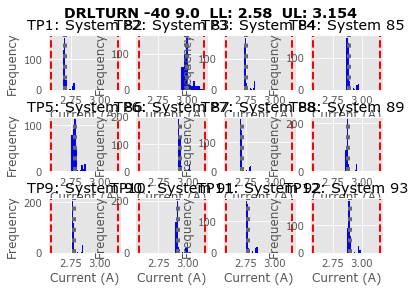

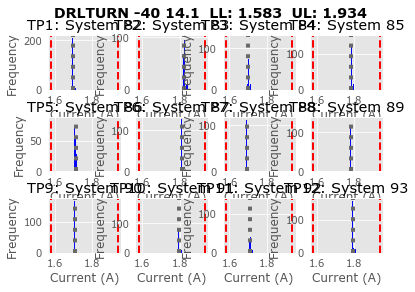

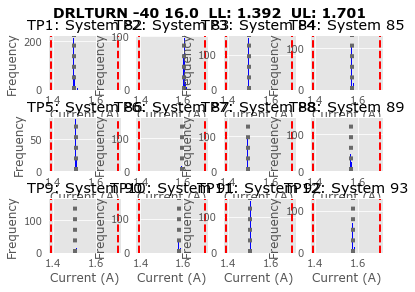

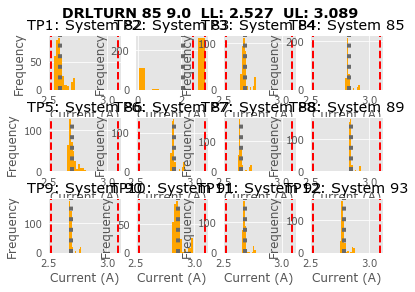

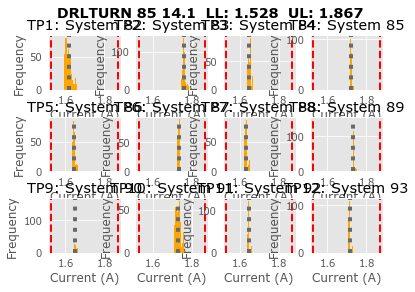

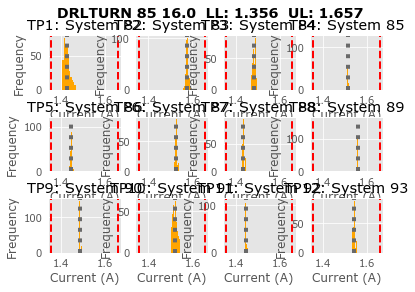

In [26]:
make_mode_histograms(test, system_by_system=True, limits=limits)